In [2]:
!pip -q install plotly

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
base_credit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bases de dados/credit_data.csv')

In [5]:
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


base_credit

  default ->  0: pagou o empréstimo
              // 1: não pagou o empréstimo

  id do cliente é uma variável nominal

  income (renda anual) é uma variável numérica contínua

  age é uma variável numérica contínua, se fosse numeros inteiros seria uma variável num discreta

  loan (dívida) é uma var num contínua

  default é uma variável numérica discreta



In [6]:
base_credit.head(10)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [7]:
base_credit.tail(10)

,clientid,income,age,loan,default
1990,1991,34237.575419,34.101654,2658.090632,0
1991,1992,26300.446554,45.539385,2317.393678,0
1992,1993,30803.806165,23.250084,623.024153,0
1993,1994,54421.410155,26.821928,3273.631823,0
1994,1995,24254.700791,37.751622,2225.284643,0
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [8]:
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


count -> quantidade de dados, se não estiver regular para todas as colunas significa que tem dados faltando

mean -> média

std -> variação dos dados em relação a média (desvio padrão)

min -> valores mínimos na coluna

max -> maiores valores na coluna


In [9]:
base_credit[base_credit['income'] >= 69995.685578]

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


In [10]:
base_credit[base_credit['loan'] <= 1.377630]

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


**Visualização dos dados em gráficos**

In [11]:
np.unique(base_credit['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

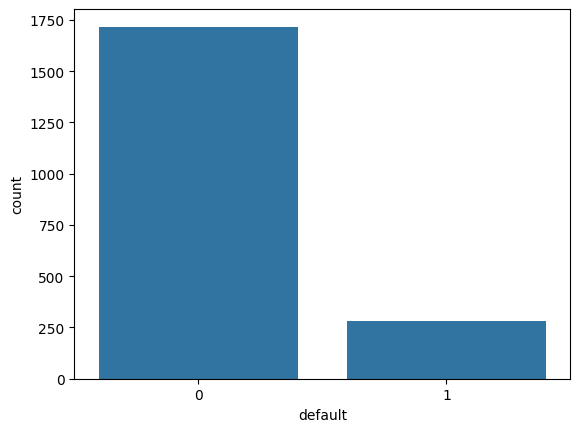

In [12]:
sns.countplot(x = base_credit['default']);

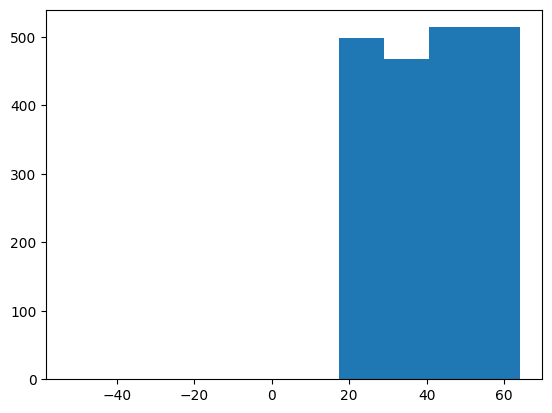

In [13]:
plt.hist(x = base_credit['age']);

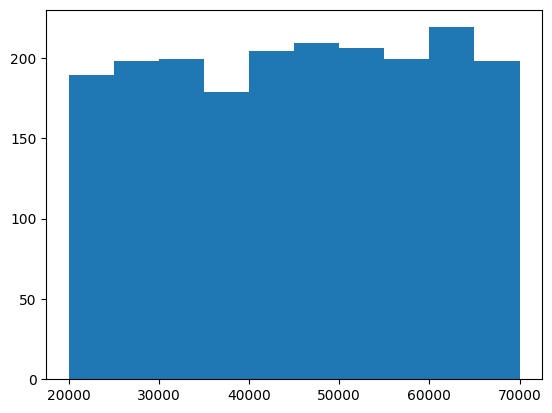

In [14]:
plt.hist(x = base_credit['income']);
# Eixo Y = frequencia de pessoas
# Eixo X = renda anual

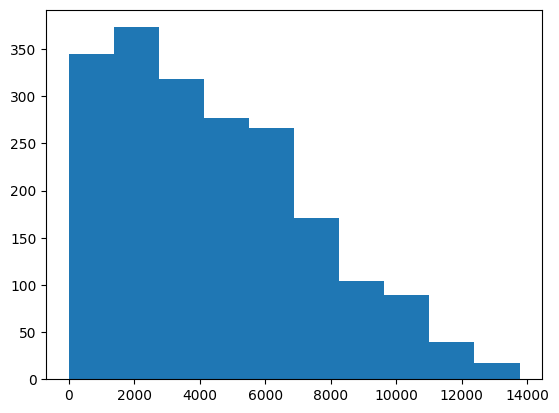

In [15]:
plt.hist(x = base_credit['loan']);

In [16]:
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color = 'default')
grafico.show()

# Scatter -> Gráfico de dispersão

**Tratamento de valores inconsistentes**

In [17]:
base_credit.loc[base_credit['age'] < 0]

# Mesma coisa que isso -> base_credit[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [18]:
# Apagando a coluna 'age' inteira
base_credit2 = base_credit.drop('age', axis = 1)
base_credit2

,clientid,income,loan,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1
...,...,...,...,...
1995,1996,59221.044874,1926.729397,0
1996,1997,69516.127573,3503.176156,0
1997,1998,44311.449262,5522.786693,1
1998,1999,43756.056605,1622.722598,0


In [19]:
base_credit.index

RangeIndex(start=0, stop=2000, step=1)

In [20]:
base_credit[base_credit['age'] < 0].index

Index([15, 21, 26], dtype='int64')

In [21]:
# Apagar somente os registros com valores inconsistentes
base_credit3 = base_credit.drop(base_credit[base_credit['age'] < 0].index)
base_credit3

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [22]:
base_credit3.loc[base_credit3['age'] < 0]

,clientid,income,age,loan,default


Ao invés de apagar, pode corrigir esses dados inconsistentes

- Preencher manualmente;
- Preencher o valor faltante com a média das idades;

In [23]:
base_credit.mean()

,0
clientid,1000.500000
income,45331.600018
age,40.807559
loan,4444.369695
default,0.141500


In [24]:
base_credit['age'].mean()

40.80755937840458

In [25]:
# Fazendo a média somente dos registros acima de 0 anos de idade

base_credit['age'][base_credit['age'] > 0].mean()

40.92770044906149

In [26]:
# Agora mudando os valores de registros inconsistentes pela média da idade

base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92

In [27]:
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default


In [28]:
base_credit.head(27)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


**O que fazer com valores não preenchidos?**

In [29]:
base_credit.isnull()

,clientid,income,age,loan,default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [30]:
base_credit.isnull().sum()

,0
clientid,0
income,0
age,3
loan,0
default,0


In [31]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [32]:
# Preenchendo os valores nulos com a média
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)

In [33]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default


In [34]:
base_credit.loc[(base_credit['clientid'] == 29) | (base_credit['clientid'] == 31) | (base_credit['clientid'] == 32)]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


In [35]:
base_credit.loc[base_credit['clientid'].isin([29, 31, 32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


**Divisão entre previsores e classe**

In [36]:
type(base_credit)

pandas.core.frame.DataFrame

In [37]:
# Selecionando como previsores somente as colunas clientid, income e age
# clientid[0]	income[1]	age[2]	loan[3]	default[4]
X_credit = base_credit.iloc[:, 1:4].values

In [38]:
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [39]:
# Para gerar o aprendizado de máquina, os dados precisa ser numpy
type(X_credit)

numpy.ndarray

In [40]:
# Dados para definição da classe
y_credit = base_credit.iloc[:, 4].values

In [41]:
y_credit

array([0, 0, 0, ..., 1, 0, 0])

In [42]:
type(y_credit)

numpy.ndarray

**Escalonamento dos valores**

In [43]:
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [44]:
# menor renda[0]
# menor idade[1]
# menor enpréstimo[2]
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [45]:
X_credit[:,0].max(), X_credit[:,1].max(), X_credit[:,2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

# Precisamos colocar na mesma escala
- Valores maiores terão pesos maiores, precisa deixar todos os valores na mesma escala;
- Pode-se utilizar padronização ou normalizaçao;
- Padronização é melhor para outliers (registros fora do padrão), exemplo idedes com valores negativos;

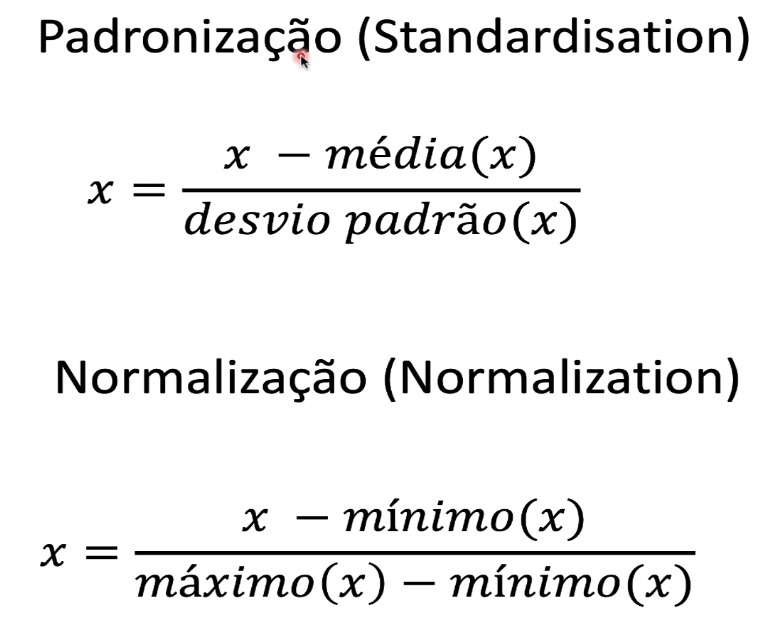

In [46]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

- Após a padronização os números estarão diferentes, mas estanndo na mesma escala;
- Agora o algoritmo não vai considerar que um atributos é melhor do que o outro porque estão na mesma escala;

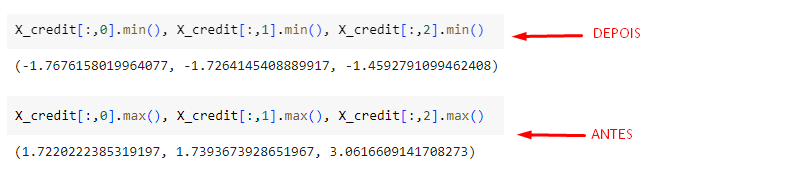

In [47]:
X_credit

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

# Treinamento e teste

In [1]:
from sklearn.model_selection import train_test_split

In [48]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, y_credit, test_size = 0.25, random_state = 0)

In [53]:
# 75% dos dados
# 1500 dados
# 3 colunas
X_credit_treinamento.shape

(1500, 3)

In [50]:
y_credit_treinamento.shape

(1500,)

In [52]:
# 25% dos dados
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

# Salvando as variáveis

In [54]:
import pickle

In [55]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste], f)